### MINI PROOJECT SQL

About Dataset

A Comprehensive Dataset on Risk Factors and Health Indicators. This dataset contains information on individuals with metabolic syndrome, a complex medical condition associated with a cluster of risk factors for cardiovascular diseases and type 2 diabetes. The data includes demographic, clinical, and laboratory measurements, as well as the presence or absence of metabolic syndrome. https://www.kaggle.com/datasets/antimoni/metabolic-syndrome


Column Descriptors:

1. **seqn:** Sequential identification number.
2. **Age:** Age of the individual.
3. **Sex:** Gender of the individual (e.g., Male, Female).
4. **Marital:** Marital status of the individual.
5. **Income:** Income level or income-related information.
6. **Race:** Ethnic or racial background of the individual.
7. **WaistCirc:** Waist circumference measurement.
8. **BMI:** Body Mass Index, a measure of body composition.
9. **Albuminuria:** Measurement related to albumin in urine.
10. **UrAlbCr:** Urinary albumin-to-creatinine ratio.
11. **UricAcid:** Uric acid levels in the blood.
12. **BloodGlucose:** Blood glucose levels, an indicator of diabetes risk.
13. **HDL:** High-Density Lipoprotein cholesterol levels (the "good" cholesterol).
14. **Triglycerides:** Triglyceride levels in the blood.
15. **MetabolicSyndrome:** Binary variable indicating the presence (1) or absence (0) of metabolic syndrome.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat

# Load dataset from an online source
url = 'https://raw.githubusercontent.com/calumatos/sql-database/main/dataset/Metabolic%20Syndrome.csv'
metabolic_df = pd.read_csv(url)

In [2]:
metabolic_df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [3]:
metabolic_df.describe()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364,0.342357
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477,0.474597
min,62161.000000,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000,0.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000,0.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000,0.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000,1.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000,1.000000


In [4]:
metabolic_df.describe(include=["O"])

,Sex,Marital,Race
count,2401,2193,2401
unique,2,5,6
top,Female,Married,White
freq,1211,1192,933


In [5]:
metabolic_df.dtypes

seqn                   int64
Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
WaistCirc            float64
BMI                  float64
Albuminuria            int64
UrAlbCr              float64
UricAcid             float64
BloodGlucose           int64
HDL                    int64
Triglycerides          int64
MetabolicSyndrome      int64
dtype: object

In [6]:
metabolic_df.shape

(2401, 15)

In [7]:
# Check for null values in each column
metabolic_df.isna().any()

seqn                 False
Age                  False
Sex                  False
Marital               True
Income                True
Race                 False
WaistCirc             True
BMI                   True
Albuminuria          False
UrAlbCr              False
UricAcid             False
BloodGlucose         False
HDL                  False
Triglycerides        False
MetabolicSyndrome    False
dtype: bool

In [8]:
# Count the number of null values in each column
metabolic_df.isna().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [9]:
# The columns with null values, what to do with them? DROP MARITAL AND INCOME, MEAN FOR WAIS AND BMI

# Marital              208
# Income               117
# WaistCirc             85
# BMI                   26

In [10]:
# Removing row with the missing data BMI column
metabolic_df.dropna(subset=['Marital'], inplace=True)
metabolic_df.dropna(subset=['Income'], inplace=True)

In [11]:
metabolic_df.isna().sum()

seqn                  0
Age                   0
Sex                   0
Marital               0
Income                0
Race                  0
WaistCirc            78
BMI                  23
Albuminuria           0
UrAlbCr               0
UricAcid              0
BloodGlucose          0
HDL                   0
Triglycerides         0
MetabolicSyndrome     0
dtype: int64

In [12]:
mean_waist = metabolic_df['WaistCirc'].mean()
mean_bmi = metabolic_df['BMI'].mean()

In [13]:
# Aplying to this specific columns 'WaistCirc' and 'BMI'

metabolic_df.WaistCirc.fillna(mean_waist, inplace=True)
metabolic_df.BMI.fillna(mean_bmi, inplace=True)

In [14]:
# Count the number of null values in each column after dropping the matiral na
metabolic_df.isna().sum()

seqn                 0
Age                  0
Sex                  0
Marital              0
Income               0
Race                 0
WaistCirc            0
BMI                  0
Albuminuria          0
UrAlbCr              0
UricAcid             0
BloodGlucose         0
HDL                  0
Triglycerides        0
MetabolicSyndrome    0
dtype: int64

In [15]:
metabolic_df.nunique()

seqn                 2090
Age                    61
Sex                     2
Marital                 5
Income                 14
Race                    6
WaistCirc             617
BMI                   315
Albuminuria             3
UrAlbCr              1266
UricAcid               87
BloodGlucose          178
HDL                    89
Triglycerides         331
MetabolicSyndrome       2
dtype: int64

In [16]:
metabolic_df['MetabolicSyndrome'].value_counts()

MetabolicSyndrome
0    1363
1     727
Name: count, dtype: int64

In [17]:
# Serching for outliers:

# Q1 = np.percentile(metabolic_df['BMI'], 25, method='midpoint')
# Q3 = np.percentile(metabolic_df['BMI'], 75, method='midpoint')
# IQR = Q3 - Q1
# print(IQR)

#bmi_filtered = metabolic_df['BMI'].std()

upper_filter = metabolic_df['BMI'].mean()+3*metabolic_df['BMI'].std()
lower_filter = metabolic_df['BMI'].mean()-3*metabolic_df['BMI'].std()

bmi_filtered = metabolic_df[(metabolic_df['BMI']  < upper_filter) & (metabolic_df['BMI']  > lower_filter)]

metabolic_filtered = bmi_filtered
metabolic_filtered

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.000000,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.100000,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.600000,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.400000,33.3,0,5.22,5.0,104,73,141,0
5,62178,80,Male,Widowed,300.0,White,112.500000,28.5,0,9.79,4.8,105,47,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,71898,65,Female,Married,5400.0,MexAmerican,98.500000,29.4,0,5.51,6.7,114,49,165,1
2397,71904,30,Female,Single,2000.0,Asian,98.512922,18.0,0,2.90,7.9,91,90,91,0
2398,71909,28,Male,Single,800.0,MexAmerican,100.800000,29.4,0,2.78,6.2,99,47,84,0
2399,71911,27,Male,Married,8200.0,MexAmerican,106.600000,31.3,0,4.15,6.2,100,41,124,1


In [18]:
metabolic_filtered.isna().sum()

seqn                 0
Age                  0
Sex                  0
Marital              0
Income               0
Race                 0
WaistCirc            0
BMI                  0
Albuminuria          0
UrAlbCr              0
UricAcid             0
BloodGlucose         0
HDL                  0
Triglycerides        0
MetabolicSyndrome    0
dtype: int64

In [19]:
###################################################################################NEW DF metabolic_filtered

In [20]:
#### HYPOTHESIS 1: Metabolic Syndrome is more prominent in women above 50 years

C:\Users\calum\AppData\Local\Temp\ipykernel_19080\2074092735.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metabolic_filtered['AgeGroup'] = pd.cut(metabolic_filtered['Age'], bins=age_bins, labels=age_labels, right=False)


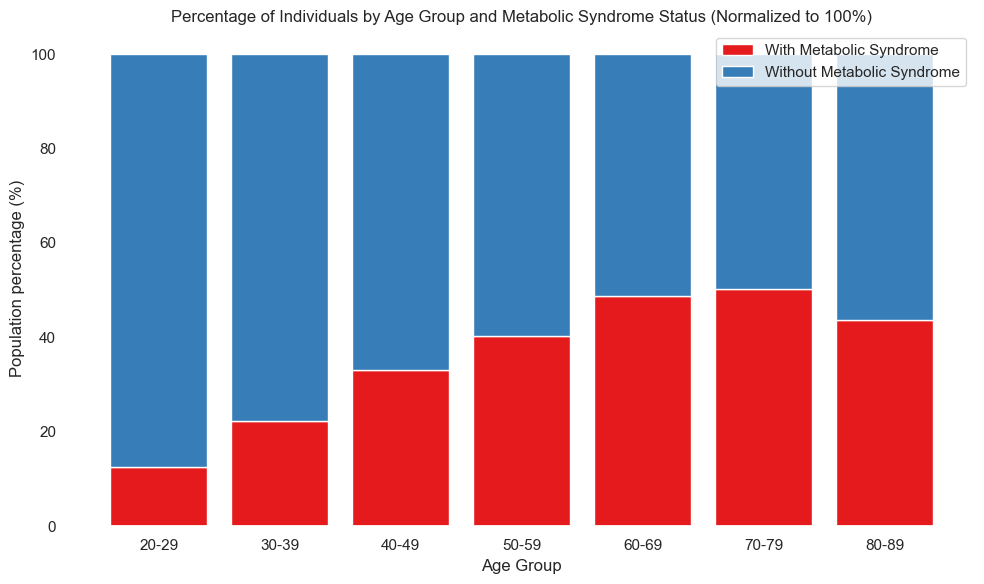

In [60]:
#### with normalised data

age_bins = range(20, 91, 10)
age_labels = [f'{i}-{i+9}' for i in age_bins[:-1]]

# Create a new 'AgeGroup' column using pd.cut and .loc
metabolic_filtered['AgeGroup'] = pd.cut(metabolic_filtered['Age'], bins=age_bins, labels=age_labels, right=False)

results = {}

for group in metabolic_filtered['AgeGroup'].unique():
    with_metabolic = metabolic_filtered[(metabolic_filtered['AgeGroup'] == group) & (metabolic_filtered['MetabolicSyndrome'] == 1)]
    without_metabolic = metabolic_filtered[(metabolic_filtered['AgeGroup'] == group) & (metabolic_filtered['MetabolicSyndrome'] == 0)]
    results[group] = {
        'with_metabolic': len(with_metabolic),
        'without_metabolic': len(without_metabolic)
    }

data = pd.DataFrame(results).T
data['total'] = data['with_metabolic'] + data['without_metabolic']

data['with_metabolic_percentage'] = (data['with_metabolic'] / data['total']) * 100
data['without_metabolic_percentage'] = (data['without_metabolic'] / data['total']) * 100

data = data.sort_index()

sns.set(rc={'figure.figsize': (10, 6), 'axes.facecolor': 'white'})
fig, ax = plt.subplots()
age_groups = data.index
x = range(len(age_groups))
colors = sns.color_palette("Set1", n_colors=2)
with_metabolic_percentages = data['with_metabolic_percentage']
without_metabolic_percentages = data['without_metabolic_percentage']

bar_width = 0.8
ax.bar(x, with_metabolic_percentages, width=bar_width, label='With Metabolic Syndrome', color=colors[0])
ax.bar(x, without_metabolic_percentages, width=bar_width, bottom=with_metabolic_percentages, label='Without Metabolic Syndrome', color=colors[1])
ax.set(title='Percentage of Individuals by Age Group and Metabolic Syndrome Status (Normalized to 100%)', xlabel='Age Group', ylabel='Population percentage (%)')
ax.set_xticks(x)
ax.set_xticklabels(age_groups, horizontalalignment='center')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

In [22]:
#### HYPOTHESIS 2: Metabolic Syndrome is more prominent among separated or divorced people

In [23]:
metabolic_filtered['Marital'].value_counts()

Marital
Married      1131
Single        464
Divorced      224
Widowed       158
Separated      89
Name: count, dtype: int64

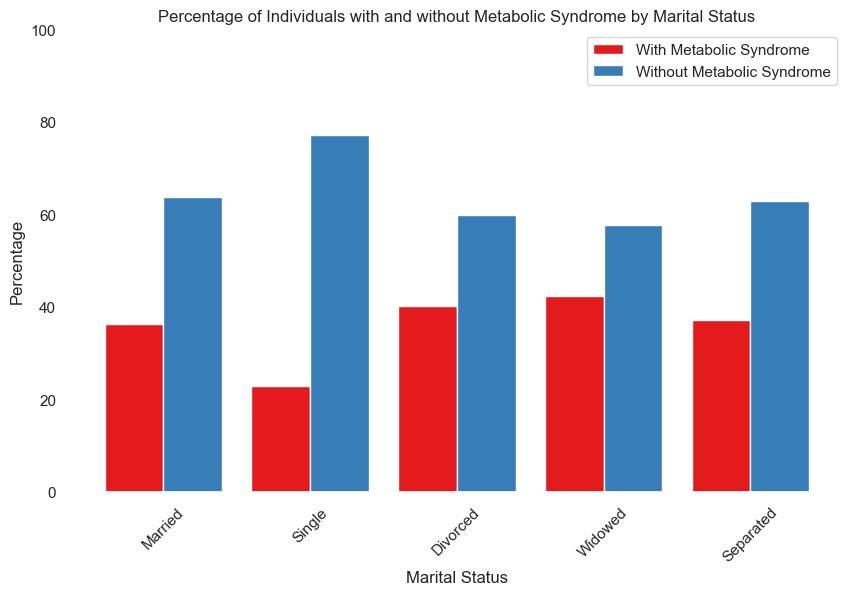

In [24]:
#### with normalised data

marital_status_categories = ['Married', 'Single', 'Divorced', 'Widowed', 'Separated']
results = {}

for category in marital_status_categories:
    with_metabolic = metabolic_filtered[(metabolic_filtered['Marital'] == category) & (metabolic_filtered['MetabolicSyndrome'] == 1)]
    without_metabolic = metabolic_filtered[(metabolic_filtered['Marital'] == category) & (metabolic_filtered['MetabolicSyndrome'] == 0)]
    
    results[category] = {
        'with_metabolic': len(with_metabolic),
        'without_metabolic': len(without_metabolic)
    }

percentages_with_metabolic = [(results[category]['with_metabolic'] / (results[category]['with_metabolic'] + results[category]['without_metabolic'])) * 100 for category in marital_status_categories]
percentages_without_metabolic = [100 - percentage for percentage in percentages_with_metabolic]

plt.figure(figsize=(10, 6))
width = 0.4  

colors = sns.color_palette("Set1", n_colors=2)

plt.bar(
    [i - width/2 for i in range(len(marital_status_categories))],
    percentages_with_metabolic,
    width=width,
    label='With Metabolic Syndrome',
    color=colors[0] 
)

plt.bar(
    [i + width/2 for i in range(len(marital_status_categories))],
    percentages_without_metabolic,
    width=width,
    label='Without Metabolic Syndrome',
    color=colors[1] 
)

plt.title('Percentage of Individuals with and without Metabolic Syndrome by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.xticks(range(len(marital_status_categories)), marital_status_categories, rotation=45)
plt.legend()
plt.show()

In [25]:
#### HYPOTHESIS 3: Metabolic syndrome is more common among lower income groups

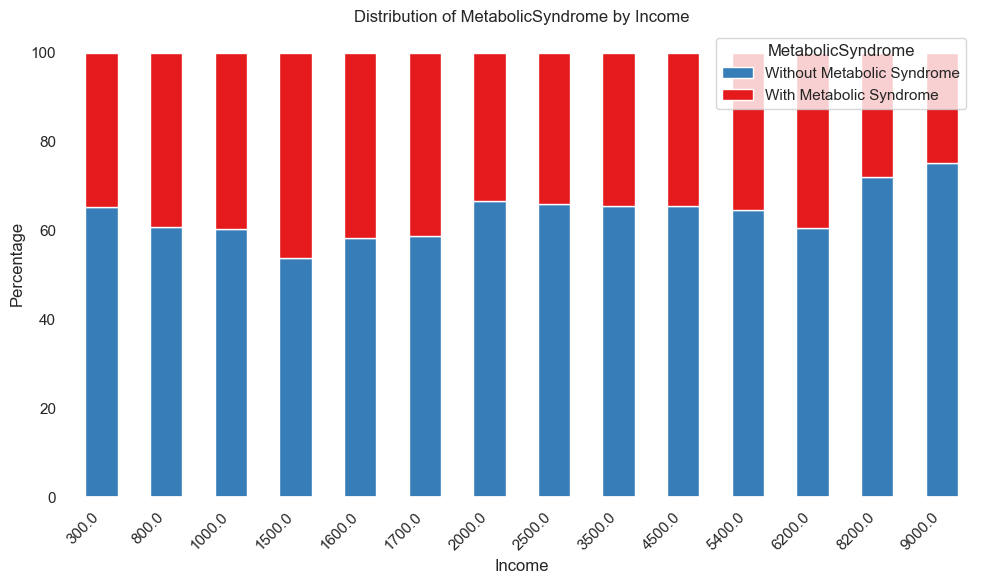

In [58]:
#### with normalised data

pivot_data = metabolic_filtered.pivot_table(index='Income', columns='MetabolicSyndrome', aggfunc='size', fill_value=0)
pivot_data = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

colors = ["#377EB8", "#E41A1C"]

sns.set(rc={'figure.figsize': (10, 6), 'axes.facecolor': 'white'})
ax = pivot_data.plot(kind='bar', stacked=True, rot=45, color=colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Distribution of MetabolicSyndrome by Income')
plt.xlabel('Income')
plt.ylabel('Percentage')
plt.legend(title='MetabolicSyndrome', title_fontsize='12', loc='upper right', labels=['Without Metabolic Syndrome', 'With Metabolic Syndrome'])
plt.tight_layout()
plt.show()

In [27]:
#### HYPOTHESIS 4: Metabolic Syndrome is more common for higher waist circumference and BMI values

                        BMI  WaistCirc  MetabolicSyndrome
BMI                1.000000   0.885534           0.420132
WaistCirc          0.885534   1.000000           0.475255
MetabolicSyndrome  0.420132   0.475255           1.000000


<Axes: >

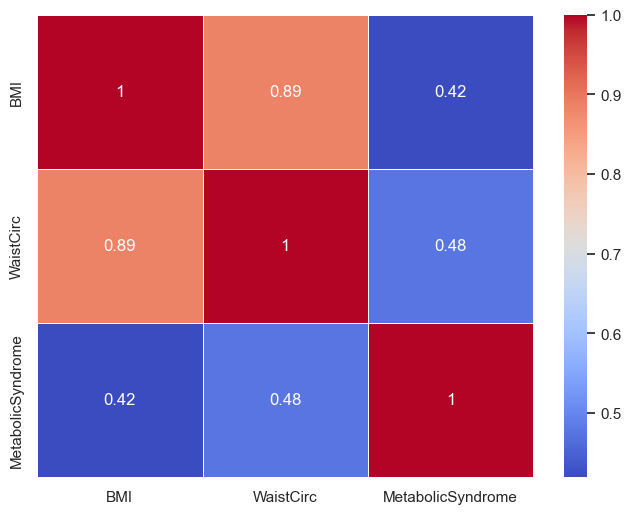

In [28]:
selected_columns = ['BMI', 'WaistCirc', 'MetabolicSyndrome']  
corr_matrix = metabolic_filtered[selected_columns].corr()
print(corr_matrix)
plt.figure(figsize=(8, 6)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

In [29]:
############################################ other visualizations ###########################################################

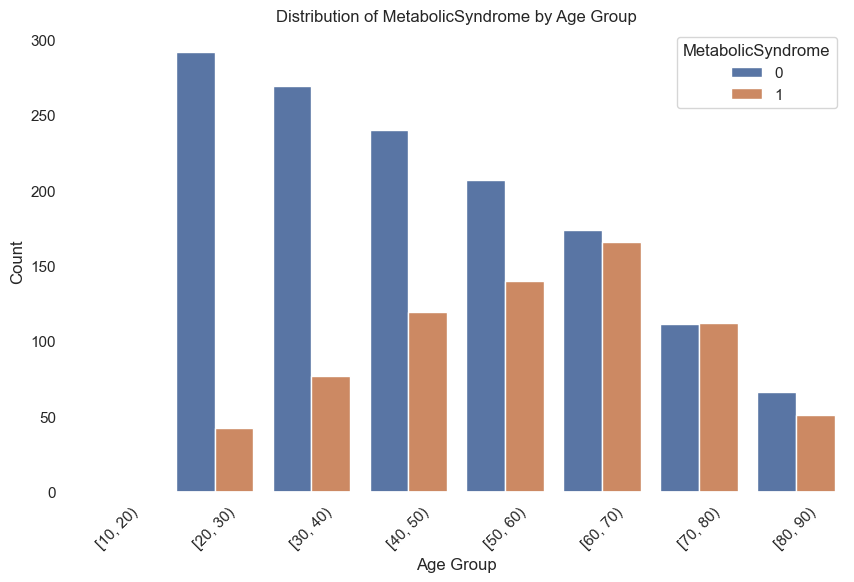

In [30]:
#### without normalised data

age_bins = range(10, 91, 10) 
metabolic_filtered.loc[:, 'AgeGroup'] = pd.cut(metabolic_filtered['Age'], bins=age_bins, right=False)

sns.countplot(data=metabolic_filtered, x='AgeGroup', hue='MetabolicSyndrome')

plt.title('Distribution of MetabolicSyndrome by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.legend(title='MetabolicSyndrome', title_fontsize='12', loc='upper right')
plt.show()

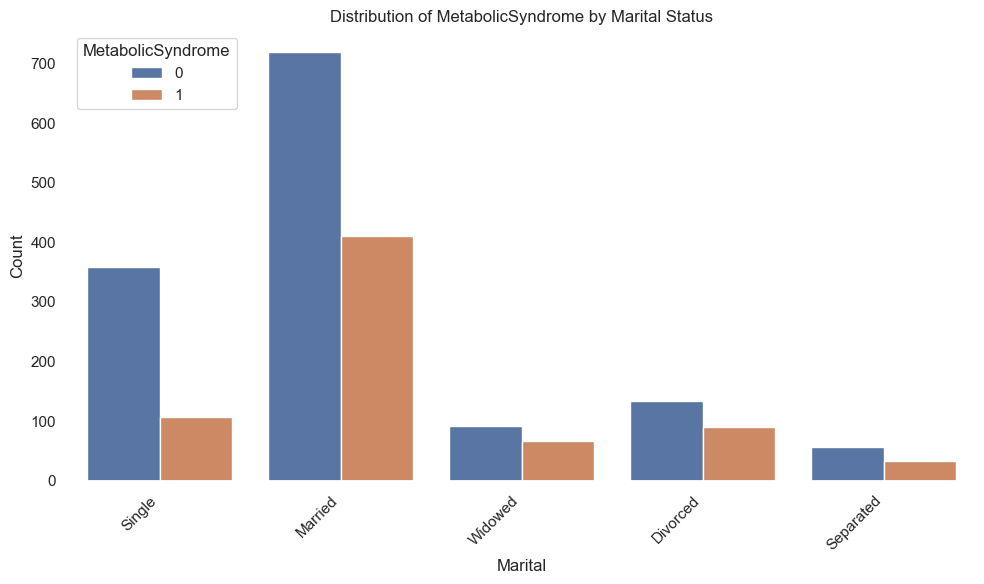

In [31]:
#### without normalised data

sns.set(rc={'figure.figsize':(10,6), 'axes.facecolor':'white'})
ax = sns.countplot(data=metabolic_filtered, x='Marital', hue='MetabolicSyndrome')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Distribution of MetabolicSyndrome by Marital Status')
plt.xlabel('Marital')
plt.ylabel('Count')
plt.legend(title='MetabolicSyndrome', title_fontsize='12', loc='upper left')
plt.tight_layout()

<Axes: xlabel='Sex', ylabel='count'>

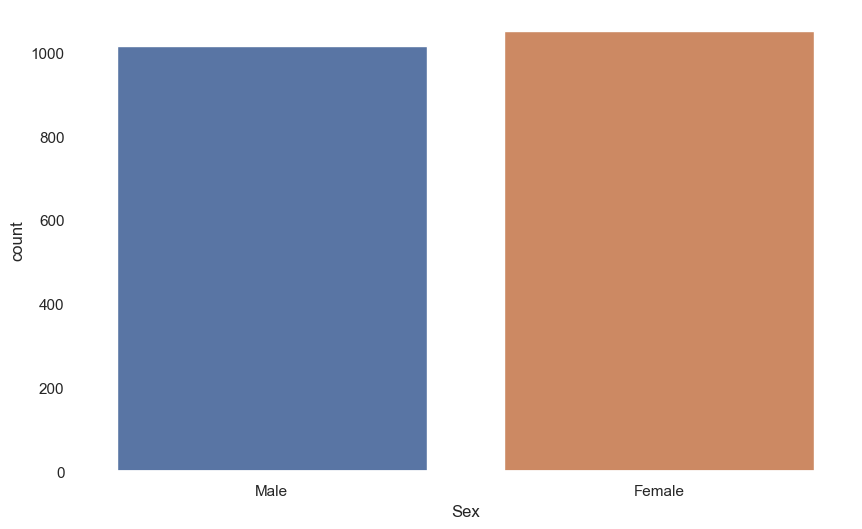

In [32]:
sns.countplot(x='Sex', data=metabolic_filtered)

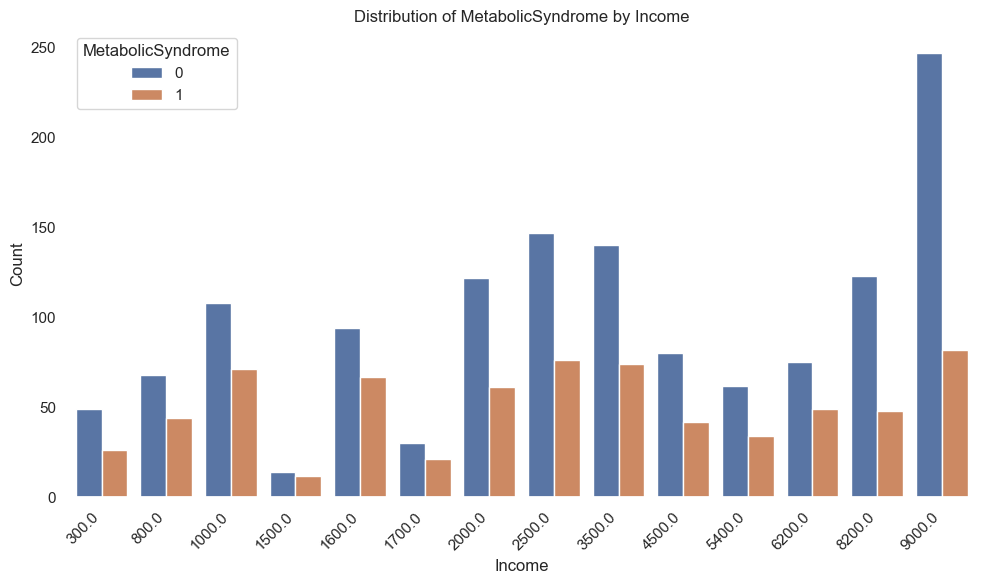

In [34]:
#### without normalised data

sns.set(rc={'figure.figsize':(10,6), 'axes.facecolor':'white'})
ax = sns.countplot(data=metabolic_filtered, x='Income', hue='MetabolicSyndrome')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Distribution of MetabolicSyndrome by Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend(title='MetabolicSyndrome', title_fontsize='12', loc='upper left')
plt.tight_layout()

<Axes: xlabel='Marital', ylabel='count'>

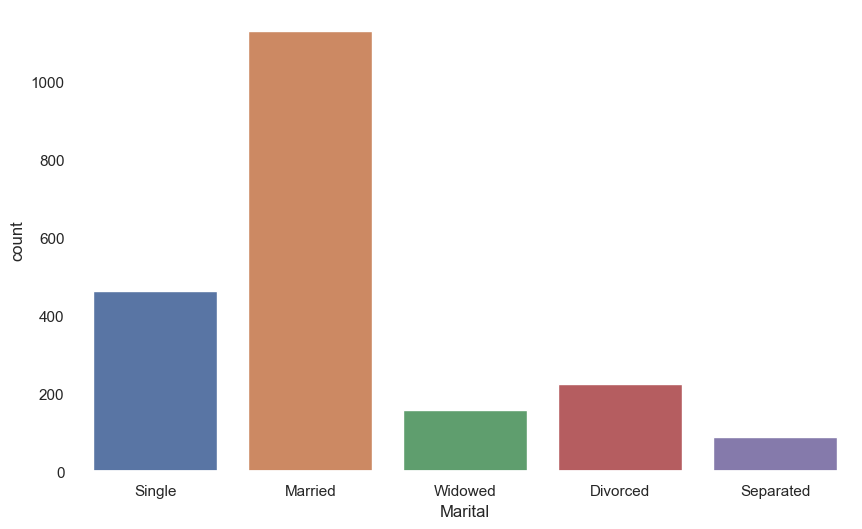

In [35]:
sns.countplot(x='Marital', data=metabolic_filtered)

<Axes: xlabel='Income', ylabel='Count'>

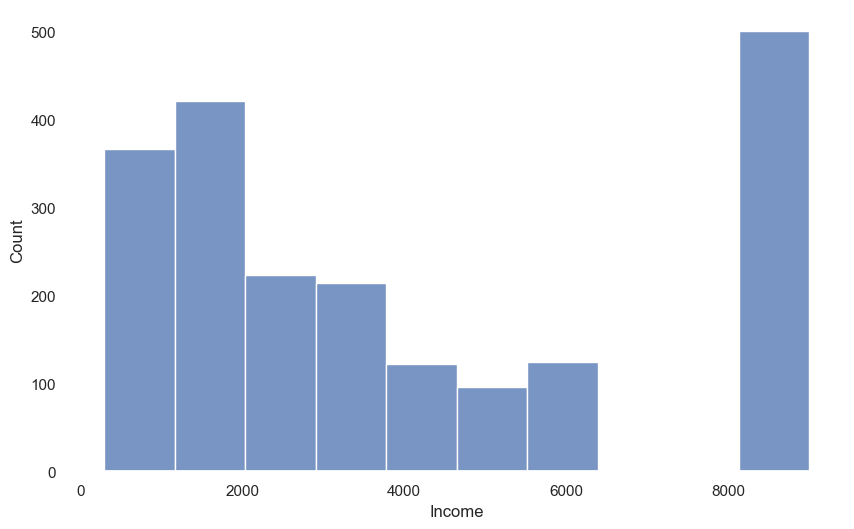

In [36]:
sns.histplot(metabolic_filtered['Income'], bins=10) 

<Axes: xlabel='Race', ylabel='count'>

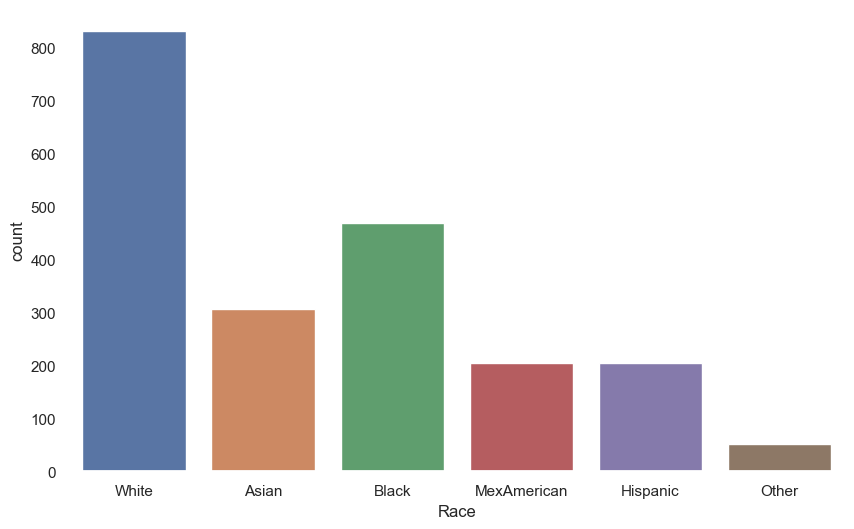

In [37]:
### Race distribution in our dataset

sns.countplot(x='Race', data=metabolic_filtered)

<Axes: xlabel='WaistCirc', ylabel='Count'>

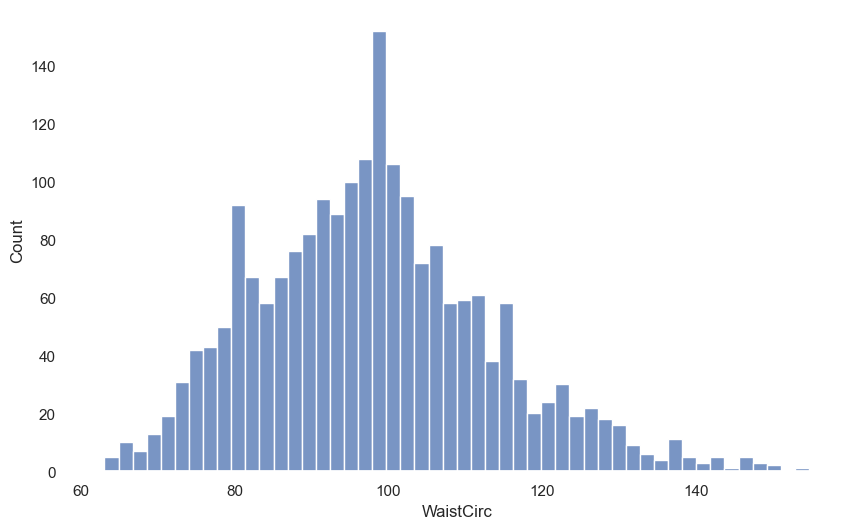

In [38]:
sns.histplot(metabolic_filtered['WaistCirc'], bins=50) 

<Axes: xlabel='BMI', ylabel='Count'>

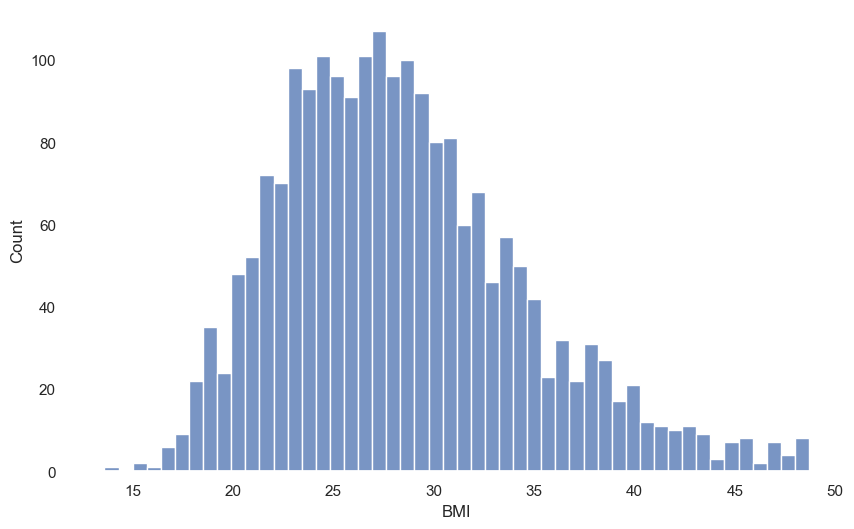

In [39]:
sns.histplot(metabolic_filtered['BMI'], bins=50) 

<Axes: xlabel='MetabolicSyndrome', ylabel='count'>

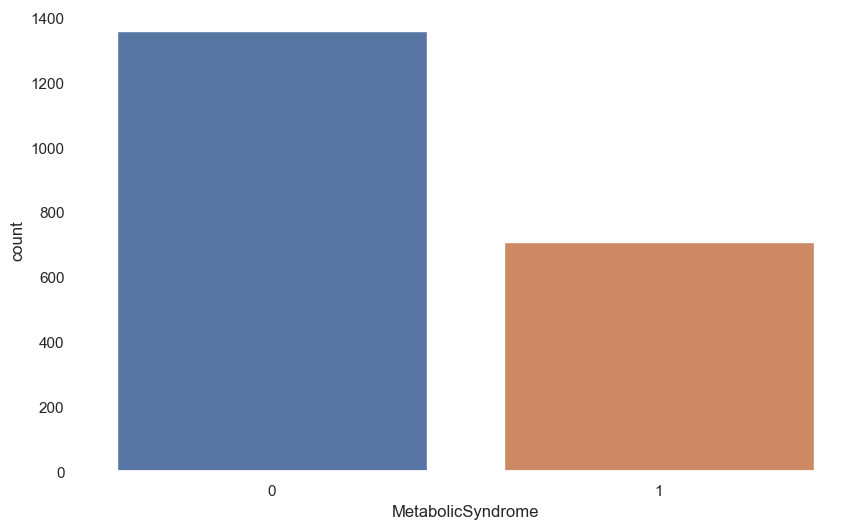

In [40]:
sns.countplot(x='MetabolicSyndrome', data=metabolic_filtered)

<Axes: xlabel='WaistCirc', ylabel='BMI'>

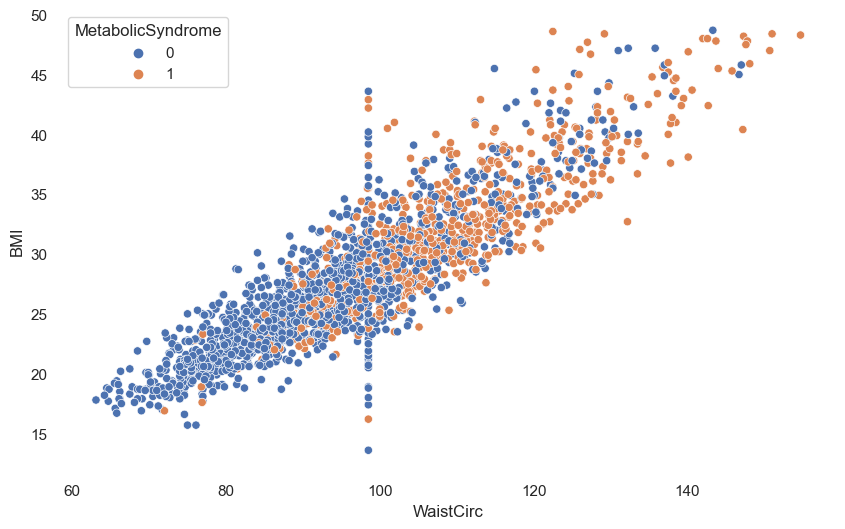

In [53]:
# Scatterplot for numerical variables
sns.scatterplot(x = "WaistCirc", y = "BMI", data = metabolic_filtered, hue='MetabolicSyndrome')

                        Age       BMI    Income  WaistCirc  MetabolicSyndrome
Age                1.000000  0.107346 -0.045227   0.245227           0.267622
BMI                0.107346  1.000000 -0.080462   0.885534           0.420132
Income            -0.045227 -0.080462  1.000000  -0.061793          -0.092407
WaistCirc          0.245227  0.885534 -0.061793   1.000000           0.475255
MetabolicSyndrome  0.267622  0.420132 -0.092407   0.475255           1.000000


<Axes: >

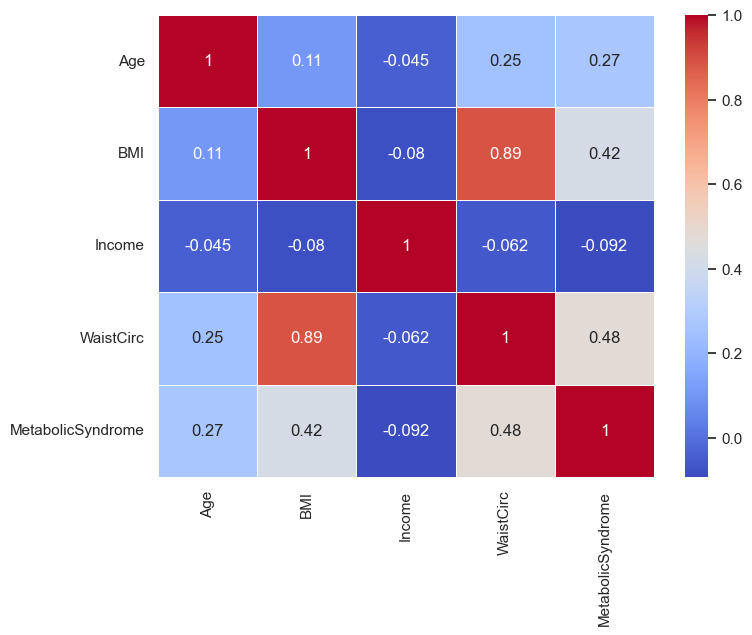

In [42]:
selected_columns = ['Age', 'BMI', 'Income', 'WaistCirc', 'MetabolicSyndrome']  
corr_matrix = metabolic_filtered[selected_columns].corr()
print(corr_matrix)
plt.figure(figsize=(8, 6)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

In [43]:
#metabolic_filtered.to_csv('metabolic.csv')

In [44]:
metabolic_filtered.describe()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
count,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000
mean,67069.310261,49.592933,4136.640852,98.023509,28.459160,0.153921,45.284332,5.490029,108.143756,53.698935,127.274927,0.342207
std,2809.109902,17.592270,2989.344781,15.301435,6.065048,0.425036,271.738905,1.431296,34.313794,15.213043,90.072136,0.474563
min,62161.000000,20.000000,300.000000,63.100000,13.600000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000,0.000000
25%,64669.750000,35.000000,1600.000000,87.200000,24.000000,0.000000,4.472500,4.500000,92.000000,43.000000,75.000000,0.000000
50%,67143.500000,49.000000,3500.000000,97.500000,27.700000,0.000000,7.020000,5.400000,99.000000,51.000000,103.000000,0.000000
75%,69498.000000,64.000000,6200.000000,106.975000,31.900000,0.000000,13.697500,6.400000,110.000000,62.000000,149.000000,1.000000
max,71915.000000,80.000000,9000.000000,154.700000,48.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1311.000000,1.000000
